# Project Working Notebook

In [1585]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

### Importing Books and Movie Data

In [1586]:
goodreads = pd.read_csv("goodreads.csv")
goodreads.head(10)

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...
5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,100821,The Book Thief,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...
6,C.S. Lewis|Pauline Baynes,"Journeys to the end of the world, fantastic cr...",Reissue Edition,Paperback,9.78007E+12,767 pages,4.25,437829,9439,The Chronicles of Narnia,Fantasy|Classics|Fiction|Young Adult|Childrens,https://images.gr-assets.com/books/1449868701l...
7,George Orwell,مزرعة الحيوانات هي رائعة جورج أورويل الخالدة.....,NaN,Paperback,9.78045E+12,122 pages,3.90,2235084,42156,Animal Farm,Classics|Fiction|Science Fiction|Dystopia|Fant...,https://images.gr-assets.com/books/1424037542l...
8,Margaret Mitchell,Gone with the Wind is a novel written by Marga...,NaN,Paperback,9.78045E+12,1037 pages,4.29,969181,17452,Gone with the Wind,Classics|Historical|Historical Fiction|Fiction...,https://images.gr-assets.com/books/1328025229l...
9,J.R.R. Tolkien,لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...,Hobbit Movie Tie-in Boxed set,Mass Market Paperback,9.78035E+12,1728 pages,4.59,99793,1652,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,Fantasy|Fiction|Classics,https://images.gr-assets.com/books/1346072396l...


In [12]:
len(goodreads)

54301

In [13]:
movies_metadata = pd.read_csv("movies_metadata.csv", low_memory=False)
movies_metadata.head(50)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [7]:
print("# of entries in movie_metadata: " + str(len(movies_metadata)))

# of entries in movie_metadata: 45466


# Webscraping of Book-->Movie Title Data

In [4]:
import sys
!{sys.executable} -m pip install selenium

In [5]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from PIL import Image
import requests
import urllib.request
import os

We initialize a new web driver and feed it the page that we want to start scraping from. In this case I want to scrape the book titles and associated movie titles from each alphabetized page starting at https://apps.mymcpl.org/botb/book/browse/0-9. 

We find the titles of each book by first looking for for href links to each albhabetized page. Then we iterate over the href links and look for all tr elements under the path listed in the body of the second for loop. We then iterate over each tr element and grab the text data for the first td class of each tr element, storing it in the book_titles list. We repeat this process for the each of the 27 pages of book and movie titles.

In [17]:
book_titles = []
movie_titles = []
hrefs = []

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://apps.mymcpl.org/botb/book/browse/0-9")

pages = driver.find_elements_by_xpath("//*[@id=\"block-system-main\"]/div/div/div[1]/p[2]/a")
for page in pages:
    hrefs.append(page.get_attribute("href"))
    
for href in hrefs:
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(href)
    print("Reading page " + href)
    tr_elems = driver.find_elements_by_xpath('//*[@id="block-system-main"]/div/div/div[2]/table/tbody/tr')
    for tr in tr_elems:
        td = tr.find_elements_by_tag_name("td")[0]
        book_titles.append(td.text[0: td.text.find(" /")])
        td = tr.find_elements_by_tag_name("td")[1]
#        print("1: " + td.text)
        rmv_second_line = td.text[:td.text.find("Find It") - 1]
#        print("2: " + rmv_second_line)
        rmv_date = rmv_second_line[::-1][7:][::-1]
#        print("3: " + rmv_date)
        movie_titles.append(rmv_date)
    driver.close()




[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Trying to download new driver from https://chromedriver.storage.googleapis.com/89.0.4389.23/chromedriver_mac64.zip
[WDM] - Driver has been saved in cache [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23]
[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/0-9


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/a


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache




Reading page https://apps.mymcpl.org/botb/book/browse/b


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache




Reading page https://apps.mymcpl.org/botb/book/browse/C


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/D


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache




Reading page https://apps.mymcpl.org/botb/book/browse/e


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/f


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache




Reading page https://apps.mymcpl.org/botb/book/browse/g


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/h


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache




Reading page https://apps.mymcpl.org/botb/book/browse/i


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache




Reading page https://apps.mymcpl.org/botb/book/browse/j


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache




Reading page https://apps.mymcpl.org/botb/book/browse/k


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/l


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache




Reading page https://apps.mymcpl.org/botb/book/browse/m


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache




Reading page https://apps.mymcpl.org/botb/book/browse/n


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/O


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/P


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache




Reading page https://apps.mymcpl.org/botb/book/browse/Q


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/R


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/S


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/T


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/U


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache




Reading page https://apps.mymcpl.org/botb/book/browse/V


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache




Reading page https://apps.mymcpl.org/botb/book/browse/W


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/X


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/Y


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/sashikanth/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Reading page https://apps.mymcpl.org/botb/book/browse/Z


In [16]:
book_movie_ref = pd.DataFrame(book_titles, columns=["Book Title"])
book_movie_ref["Movie Title"] = movie_titles
book_movie_ref.head(50)

NameError: name 'book_titles' is not defined

In [21]:
total_rows = len(book_movie_ref.index)
total_rows

4240

# Removing Duplicate Entries

In [22]:
book_movie_ref_rmv_duplicate_books = book_movie_ref.drop_duplicates(subset="Book Title")
book_movie_ref_rmv_duplicate_books.head(50)

,Book Title,Movie Title
0,1 Message,1 Message
1,"100, The","100, The (series)"
2,11 Harrowhouse,11 Harrowhouse
3,13 Hours: The Inside Account of What Really Ha...,13 Hours
4,"13th Man,",Last Embrace
5,1408 (short story),1408
6,"15:17 to Paris: The True Story of a Terrorist,...","15:17 to Paris, The"
7,"16th Round, The","Hurricane, The"
8,1922,1922
9,1922 (novella),1922 (series)


In [24]:
len(book_movie_ref_rmv_duplicate_books)

3912

In [25]:
book_movie_ref_rmv_duplicate_books.to_csv("book_movie_ref.csv", index=False)

In [14]:
# load book_movie_ref.csv instead of reiterating after kernel restarts

book_movie_ref_rmv_duplicate_books = pd.read_csv("book_movie_ref.csv")

In [46]:
book_movie_ref_duplicate_tagged = book_movie_ref
book_movie_ref_duplicate_tagged["Duplicate?"] = book_movie_ref_duplicate_tagged.duplicated(subset="Book Title")


In [35]:
book_movie_ref_duplicate_tagged[book_movie_ref_duplicate_tagged["Duplicate?"] == True].head(50)

,Book Title,Movie Title,Duplicate?
11,1984,1984,True
18,30 Days of Night (graphic novel),30 Days of Night: Dark Days,True
23,52 Pick-Up,"Ambassador, The",True
41,Above Suspicion,Above Suspicion,True
65,"Adventures of Huckleberry Finn, The",Huckleberry Finn,True
66,"Adventures of Huckleberry Finn, The","Adventures of Huckleberry Finn, The",True
67,"Adventures of Huckleberry Finn, The",Huck and the King of Hearts,True
70,"Adventures of Pinocchio, The",Pinocchio,True
71,"Adventures of Pinocchio, The","Adventures of Pinocchio, The",True
73,"Adventures of Tom Sawyer, The",Tom and Huck,True


# Implementing Fuzzy Matching 

In [7]:
pip install fuzzywuzzy[speedup]

Note: you may need to restart the kernel to use updated packages.


In [8]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [9]:
import difflib
difflib.get_close_matches

<function difflib.get_close_matches(word, possibilities, n=3, cutoff=0.6)>

In [55]:
book_choices = goodreads["book_title"].values.tolist()
movie_choices = movies_metadata["original_title"].values.tolist()

df_final = pd.DataFrame(columns = list(goodreads.columns) + list(movies_metadata.columns))

counter = 0
for index, row in book_movie_ref_rmv_duplicate_books.iterrows():
    book_name = row[0]
    movie_name = row[1]
    best_book = process.extract(query=book_name, choices=book_choices, scorer=fuzz.ratio, limit=1)
    best_movie = process.extract(query=movie_name, choices=movie_choices, scorer=fuzz.ratio, limit=1)
    if best_book[0][1] > 87:
        if best_movie[0][1] > 87:
            print("successful match " + str(counter) + ": " + best_book[0][0] + ", " + best_movie[0][0])
            best_book_row = list(goodreads.loc[goodreads["book_title"] == best_book[0][0]].iloc[0])
            best_movie_row = list(movies_metadata.loc[movies_metadata["original_title"] == best_movie[0][0]].iloc[0])
            book_movie_list = best_book_row + best_movie_row
            df_final.loc[counter] = book_movie_list
            counter += 1
            
print(counter)

successful match 0: 1984, 1984
successful match 1: 2001: A Space Odyssey, 2001: A Space Odyssey
successful match 2: 2010: Odyssey Two, 2010
successful match 3: 24 Hours, Trapped
successful match 4: 52 Pickup, 52 Pick-Up
successful match 5: 633 Squadron, 633 Squadron
successful match 6: 84, Charing Cross Road, 84 Charing Cross Road
successful match 7: About a Boy, About a Boy
successful match 8: Above Suspicion, Above Suspicion
successful match 9: Abraham Lincoln: Vampire Hunter, Abraham Lincoln: Vampire Hunter
successful match 10: Absolute Power, Absolute Power
successful match 11: Adam, Adam
successful match 12: Addicted, Addicted
successful match 13: Admission, Admission
successful match 14: Affliction, Affliction
successful match 15: Airport, Airport 1975
successful match 16: Alexander and the Terrible, Horrible, No Good, Very Bad Day, Alexander and the Terrible, Horrible, No Good, Very Bad Day
successful match 17: Alive, Alive
successful match 18: All Fall Down, All Fall Down
succe

successful match 150: Cross, Alex Cross
successful match 151: Cross Creek, Cross Creek
successful match 152: Cry, the Beloved Country, Cry, the Beloved Country
successful match 153: Cujo, Cujo
successful match 154: Curious George, Curious George
successful match 155: Daddy-Long-Legs, Daddy-Long-Legs
successful match 156: Dances with Wolves, Dances with Wolves
successful match 157: Dangerous Minds, Dangerous Minds
successful match 158: Dark Places, Dark Places
successful match 159: Dark Water, Dark Water
successful match 160: Dear John, Dear John
successful match 161: The Death and Life of Charlie St. Cloud, Charlie St. Cloud
successful match 162: A Death in the Family, All the Way Home
successful match 163: Death Wish, Death Wish
successful match 164: Defiance, Defiance
successful match 165: Delirium, Delirium
successful match 166: Deliverance, Deliverance
successful match 167: Demon Seed, Demon Seed
successful match 168: Der Steppenwolf, Steppenwolf
successful match 169: Derailed, Der

successful match 294: Hide in Plain Sight, Hide in Plain Sight
successful match 295: Hideaway, Hideaway
successful match 296: Hideous Kinky, Hideous Kinky
successful match 297: High-Rise, High-Rise
successful match 298: The History of Tom Jones, a Foundling, Tom Jones
successful match 299: Holes, Holes
successful match 300: A Home at the End of the World, A Home at the End of the World
successful match 301: Home Front, Homefront
successful match 302: Hoot, Hoot
successful match 303: Hopscotch, Hopscotch
successful match 304: Horns, Horns
successful match 305: Horseman, Pass By, Hud
successful match 306: Horton Hears a Who!, Horton Hears a Who!
successful match 307: Hostage, Hostage
successful match 308: Hostage, Hostages
successful match 309: Hotel, Hotel
successful match 310: House of Cards, House of Cards
successful match 311: House of Sand and Fog, House of Sand and Fog
successful match 312: Housekeeping, Housekeeping
successful match 313: How Green Was My Valley, How Green Was My V

successful match 438: Miss Shumway Waves a Wand, Rough Magic
successful match 439: Mister Johnson, Mister Johnson
successful match 440: Moby-Dick or, The Whale, Moby Dick
successful match 441: Moll Flanders, Moll Flanders
successful match 442: Mommie Dearest, Mommie Dearest
successful match 443: Moneyball: The Art of Winning an Unfair Game, Moneyball
successful match 444: Monte Walsh, Monte Walsh
successful match 445: Moonraker, Moonraker
successful match 446: Moonrise, Moonrise
successful match 447: Mother Night, Mother Night
successful match 448: Mountain Man, Jeremiah Johnson
successful match 449: Mr. Popper's Penguins, Mr. Popper's Penguins
successful match 450: Mrs. Dalloway, Mrs. Dalloway
successful match 451: Murder on the Orient Express, Murder on the Orient Express
successful match 452: Murder on the Orient Express, Murder on the Orient Express
successful match 453: Must Love Dogs, Must Love Dogs
successful match 454: Mutiny on the Bounty, Mutiny on the Bounty
successful match

successful match 588: Seize the Day, Seize the Day
successful match 589: Semi-Tough, Semi-Tough
successful match 590: Sense and Sensibility, Sense and Sensibility
successful match 591: Serena, Serena
successful match 592: Seven Days In May, Seven Days in May
successful match 593: Seven Years in Tibet, Seven Years in Tibet
successful match 594: Shadowland, Shadowlands
successful match 595: Shane, Shane
successful match 596: Shattered, Shattered
successful match 597: Shiloh, Shiloh
successful match 598: Shiloh Season, Shiloh 2: Shiloh Season
successful match 599: Shiver, Shivers
successful match 600: Shock Treatment, Shock Treatment
successful match 601: Shoeless Joe, Field of Dreams
successful match 602: Shopgirl, Shopgirl
successful match 603: Shutter Island, Shutter Island
successful match 604: Siddhartha, Zachariah
successful match 605: Sideways, Sideways
successful match 606: Silence, Silence
successful match 607: Single White Female, Single White Female
successful match 608: Sister

successful match 733: Wild: From Lost to Found on the Pacific Crest Trail, Wild
successful match 734: Wildfire, Red Canyon
successful match 735: Winterkill, Winter Kills
successful match 736: Winter's Bone, Winter's Bone
successful match 737: Winter's Tale, Winter's Tale
successful match 738: Winterdance: The Fine Madness of Running the Iditarod, Snow Dogs
successful match 739: Wise Blood, Wise Blood
successful match 740: Wolfen, Wolfen
successful match 741: Woman, Thou Art Loosed!: Healing the Wounds of the Past, Woman Thou Art Loosed
successful match 742: World War Z: An Oral History of the Zombie War, World War Z
successful match 743: Wuthering Heights, Wuthering Heights
successful match 744: Heart of the Dragon, Year of the Dragon
successful match 745: Yes Man, Yes Man
successful match 746: Z, Z
successful match 747: Z for Zachariah, Z for Zachariah
successful match 748: Zodiac, Zodiac
749


In [61]:
# load df_final.csv instead of reiterating after kernel restarts

df_final = pd.read_csv("df_final.csv")

In [26]:
df_final.head(50)

,Unnamed: 0,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,George Orwell|Erich Fromm,"Among the seminal texts of the 20th century, N...",Signet Classics,Mass Market Paperback,9.780450e+12,328 pages,4.16,2420816,53773,...,1956-03-06,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Big Brother is Watching.,1984,False,7.0,23.0
1,1,Arthur C. Clarke,"On the Moon, an enigma is uncovered.So great a...",NaN,Paperback,9.780450e+12,297 pages,4.13,201953,4368,...,1968-04-10,68700000.0,149.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An epic drama of adventure and exploration,2001: A Space Odyssey,False,7.9,3075.0
2,2,Arthur C. Clarke,Nine years after the disastrous Discovery miss...,NaN,Paperback,9.780350e+12,320 pages,3.90,44617,961,...,1984-12-06,40400657.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"""Something wonderful is going to happen""",2010,False,6.6,290.0
3,3,Greg Iles,24 HOURS --- that's how long it takes a madman...,NaN,Paperback,9.780340e+12,448 pages,3.97,8634,554,...,2002-09-20,6916869.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was the perfect plan until she refused to b...,Trapped,False,5.8,140.0
4,4,Elmore Leonard,Detroit businessman Harry Mitchell is a self-m...,NaN,Paperback,9.780750e+12,212 pages,3.94,6498,237,...,1986-11-07,5186646.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They shouldn't have blackmailed Harry Mitchell...,52 Pick-Up,False,5.8,23.0
5,5,Frederick E. Smith,This bestselling novel has gone into 25 editio...,NaN,Paperback,9.780300e+12,NaN,3.89,117,8,...,1964-04-06,0.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,633 Squadron,False,5.3,16.0
6,6,Helene Hanff,"This charming classic love story, first publis...",NaN,Paperback,9.780140e+12,97 pages,4.19,33694,4901,...,1987-02-13,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,84 Charing Cross Road,False,6.8,34.0
7,7,Nick Hornby,'How cool was Will Freeman?'Too cool! At thirt...,NaN,Mass Market Paperback,9.780140e+12,307 pages,3.79,116559,2969,...,2002-04-26,129000000.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ordinary couple. One little white lie.,About a Boy,False,6.6,627.0
8,8,Helen MacInnes,"It is the summer of 1939. A young Oxford don, ...",NaN,Hardcover,9.780150e+12,333 pages,3.84,1329,147,...,1995-01-01,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They thought they could get away with murder. ...,Above Suspicion,False,6.8,11.0
9,9,Seth Grahame-Smith,"Indiana, 1818. Moonlight falls through the den...",First,Hardcover,9.780450e+12,336 pages,3.70,123172,12143,...,2012-06-20,112265139.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Are you a patriot or a vampire?,Abraham Lincoln: Vampire Hunter,False,5.5,1297.0


In [27]:
len(list(goodreads.columns) + list(movies_metadata.columns)) 

36

In [59]:
df_final.to_csv("df_final")

### Test Matching title instead of original_title

In [28]:
book_choices = goodreads["book_title"].values.tolist()
movie_choices_title = movies_metadata["title"].values.tolist()
cleaned_movie_choices_title = [x for x in movie_choices_title if str(x) != 'nan']

blacklisted_queries = ["Chéri", "Les Misérables", "Maya", "Ten"]
blacklist_indexes = []
for query in blacklisted_queries:
    blacklist_indexes.append(book_movie_ref_rmv_duplicate_books[book_movie_ref_rmv_duplicate_books["Book Title"] == query].index[0])
book_movie_ref_whitelisted = book_movie_ref_rmv_duplicate_books.drop(blacklist_indexes)

df_final_titlematch = pd.DataFrame(columns = list(goodreads.columns) + list(movies_metadata.columns))

counter = 0
for index, row in book_movie_ref_whitelisted.iterrows():
    book_name = row[0]
    movie_name = row[1]
    best_book = process.extract(query=book_name, choices=book_choices, scorer=fuzz.ratio, limit=1)
    best_movie = process.extract(query=movie_name, choices=cleaned_movie_choices_title, scorer=fuzz.ratio, limit=1)
    if best_book[0][1] > 87 and best_movie[0][1] > 87:
        print("successful match " + str(counter) + ": " + best_book[0][0] + ", " + best_movie[0][0])
        best_book_row = list(goodreads.loc[goodreads["book_title"] == best_book[0][0]].iloc[0])
        #print(len(best_book_row))
        best_movie_row = list(movies_metadata.loc[movies_metadata["title"] == best_movie[0][0]].iloc[0])
        #print(len(best_movie_row))
        if len(best_book_row) != 12 or len(best_movie_row) != 24:
            print("ERROR: Column Number Discrepancy")
            break
        book_movie_list = best_book_row + best_movie_row
        df_final_titlematch.loc[counter] = book_movie_list
        counter += 1
            
print(counter)

successful match 0: 1984, 1984
successful match 1: 2001: A Space Odyssey, 2001: A Space Odyssey
successful match 2: 2010: Odyssey Two, 2010
successful match 3: 24 Hours, Trapped
successful match 4: 52 Pickup, 52 Pick-Up
successful match 5: 633 Squadron, 633 Squadron
successful match 6: 84, Charing Cross Road, 84 Charing Cross Road
successful match 7: About a Boy, About a Boy
successful match 8: Above Suspicion, Above Suspicion
successful match 9: Abraham Lincoln: Vampire Hunter, Abraham Lincoln: Vampire Hunter
successful match 10: Absolute Power, Absolute Power
successful match 11: Adam, Adam
successful match 12: Addicted, Addicted
successful match 13: Admission, Admission
successful match 14: Affliction, Affliction
successful match 15: The Age of Innocence, The Age of Innocence
successful match 16: Airport, Airport 1975
successful match 17: Alexander and the Terrible, Horrible, No Good, Very Bad Day, Alexander and the Terrible, Horrible, No Good, Very Bad Day
successful match 18: Aliv

successful match 149: Corelli's Mandolin, Captain Corelli's Mandolin
successful match 150: Cousin Bette, Cousin Bette
successful match 151: Crash, Crash
successful match 152: Crazy in Alabama, Crazy in Alabama
successful match 153: Crime and Punishment, Crime and Punishment
successful match 154: Criss Cross, Criss Cross
successful match 155: Cross, Alex Cross
successful match 156: Cross Creek, Cross Creek
successful match 157: Cry, the Beloved Country, Cry, the Beloved Country
successful match 158: Cujo, Cujo
successful match 159: Curious George, Curious George
successful match 160: Daddy-Long-Legs, Daddy-Long-Legs
successful match 161: Dances with Wolves, Dances with Wolves
successful match 162: Dangerous Minds, Dangerous Minds
successful match 163: Dark Angel, A Sister's Secret
successful match 164: Dark Places, Dark Places
successful match 165: Dark Water, Dark Water
successful match 166: Dear John, Dear John
successful match 167: The Death and Life of Charlie St. Cloud, Charlie St.

successful match 296: Harry Potter and the Half-Blood Prince, Harry Potter and the Half-Blood Prince
successful match 297: Harry Potter and the Order of the Phoenix, Harry Potter and the Order of the Phoenix
successful match 298: Harry Potter and the Prisoner of Azkaban, Harry Potter and the Prisoner of Azkaban
successful match 299: Haunted, Haunted
successful match 300: He's Just Not That Into You: The No-Excuses Truth to Understanding Guys, He's Just Not That Into You
successful match 301: Headhunters, Monte Carlo
successful match 302: Heart of Darkness, Apocalypse Now
successful match 303: Heartburn, Heartburn
successful match 304: Hearts in Atlantis, Hearts in Atlantis
successful match 305: Heat, Wild Card
successful match 306: Heaven's Prisoners, Heaven's Prisoners
successful match 307: Hick, Hick
successful match 308: Hide in Plain Sight, Hide in Plain Sight
successful match 309: Hideaway, Hideaway
successful match 310: Hideous Kinky, Hideous Kinky
successful match 311: High-Rise

successful match 437: The Master of Disguise: My Secret Life in the CIA, Argo
successful match 438: Matilda, Matilda
successful match 439: Maurice, Maurice
successful match 440: Me and Earl and the Dying Girl, Me and Earl and the Dying Girl
successful match 441: Me Before You, Me Before You
successful match 442: Memed, My Hawk, Memed My Hawk
successful match 443: Memoirs of a Geisha, Memoirs of a Geisha
successful match 444: Memoirs of a Teenage Amnesiac, Memoirs of a Teenage Amnesiac
successful match 445: Memoirs of an Invisible Man, Memoirs of an Invisible Man
successful match 446: Mermaid, Mermaids
successful match 447: Message in a Bottle, Message in a Bottle
successful match 448: Metamorphoses, Metamorphoses
successful match 449: Middle School: The Worst Years of My Life, Middle School: The Worst Years of My Life
successful match 450: Midnight, Midnight
successful match 451: Midnight Express, Midnight Express
successful match 452: Midnight in the Garden of Good and Evil, Midnight 

successful match 577: Rabbit, Run, Rabbit, Run
successful match 578: Ragtime, Ragtime
successful match 579: Raintree County, Raintree County
successful match 580: Raise the Titanic!, Raise the Titanic
successful match 581: Ramage, Rampage
successful match 582: Random Harvest, Random Harvest
successful match 583: Gracie: A Love Story, Vengeance: A Love Story
successful match 584: Reaper, Reaper
successful match 585: Rebecca, Rebecca
successful match 586: Red, Red
successful match 587: Red Dragon, Red Dragon
successful match 588: The Remains of the Day, The Remains of the Day
successful match 589: Requiem for a Dream, Requiem for a Dream
successful match 590: Restoration, Restoration
successful match 591: Resurrection Men, Resurrection Man
successful match 592: Return to Paradise, Return to Paradise
successful match 593: Revenge, Revenge
successful match 594: Revolutionary Road, Revolutionary Road
successful match 595: Riders of the Purple Sage, Riders of the Purple Sage
successful match

successful match 729: Twice-Told Tales, Twice-Told Tales
successful match 730: Twins, Dead Ringers
successful match 731: Ulysses, Ulysses
successful match 732: Unbroken: A World War II Story of Survival, Resilience and Redemption, Unbroken
successful match 733: Under the Skin, Under the Skin
successful match 734: Under the Volcano, Under the Volcano
successful match 735: Up in the Air, Up in the Air
successful match 736: Valley of the Dolls, Valley of the Dolls
successful match 737: Vampire Academy, Vampire Academy
successful match 738: Vampire$, Vampires
successful match 739: Venus in Furs, Venus in Furs
successful match 740: Victory, Victory
successful match 741: Waiting to Exhale, Waiting to Exhale
successful match 742: A Walk Among the Tombstones, A Walk Among the Tombstones
successful match 743: A Walk on the Wild Side, Walk on the Wild Side
successful match 744: War and Peace, War and Peace
successful match 745: The War of the Worlds, War of the Worlds
successful match 746: Washi

In [29]:
df_final_titlematch.to_csv("df_final_titlematch.csv")

In [195]:
# load df_final_titlematch.csv instead of reiterating after kernel restarts

df_final_titlematch = pd.read_csv("df_final_titlematch.csv")

## Try Directmatching goodreads --> movie_metadata

In [ ]:
book_choices = goodreads['book_title']
movie_choices = movies_metadata['title']
movie_choices = ["PLACEHOLDER TITLE" if (type(x)!=str and math.isnan(int(x))) else x for x in movie_choices]
processed_books = [utils.default_process(book) for book in book_choices]
processed_movies = [utils.default_process(movie) for movie in movie_choices]

movies_metadata["title"] = processed_movies

df_test = pd.DataFrame(columns = list(movies_metadata.columns))

counter = 0
for (i, processed_query) in enumerate(processed_books):
    # None is skipped by extractOne, so we set the current element to None and
    # revert this change after the comparision
    processed_books[i] = None
    movie_match = process.extractOne(processed_query, processed_movies, processor=None, score_cutoff=95)
    processed_books[i] = processed_query
    print("Iteration #" + str(counter))
    if movie_match:
        df_test.loc[counter] = movies_metadata.loc[movies_metadata['title'] == movie_match[0]].values[0]
    else:
        df_test.loc[counter] = ["REMOVE_ROW" for x in list(movies_metadata.columns)]
    counter += 1

In [1591]:
df_final_titlematch = pd.read_csv("df_directmatch")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1592]:
df_final_titlematch.columns

Index(['Unnamed: 0', 'book_authors', 'book_desc', 'book_edition',
       'book_format', 'book_isbn', 'book_pages', 'book_rating',
       'book_rating_count', 'book_review_count', 'book_title', 'genres_x',
       'image_url', 'adult', 'belongs_to_collection', 'budget', 'genres_y',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [1593]:
df_final_titlematch = df_final_titlematch.drop_duplicates(subset="book_title")

In [1594]:
df_final_titlematch = df_final_titlematch.drop("Unnamed: 0", axis=1)

In [1595]:
len(df_final_titlematch)

48483

# Further Data Cleaning and Feature Engineering

In [1596]:
import collections
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [1597]:
df_final_titlematch.columns

Index(['book_authors', 'book_desc', 'book_edition', 'book_format', 'book_isbn',
       'book_pages', 'book_rating', 'book_rating_count', 'book_review_count',
       'book_title', 'genres_x', 'image_url', 'adult', 'belongs_to_collection',
       'budget', 'genres_y', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count'],
      dtype='object')

In [1598]:
df_final_titlematch = df_final_titlematch[['book_title', 'title', 'original_title', 'book_authors', 'book_desc', 'book_edition', 'book_format', 'book_isbn',
       'book_pages', 'book_rating', 'book_rating_count', 'book_review_count',
       'genres_x', 'image_url', 'adult', 'belongs_to_collection',
       'budget', 'genres_y', 'homepage', 'id', 'imdb_id', 'original_language',
       'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'video', 'vote_average', 'vote_count']]

In [1599]:
df_final_titlematch = df_final_titlematch.drop("genres_y", axis=1)

In [1600]:
df_final_titlematch.genres_x

0        Young Adult|Fiction|Science Fiction|Dystopia|F...
1                              Fantasy|Young Adult|Fiction
2        Classics|Fiction|Historical|Historical Fiction...
3                                 Classics|Fiction|Romance
4        Young Adult|Fantasy|Romance|Paranormal|Vampire...
                               ...                        
54296    Sports|Baseball|Sports and Games|Sports|Nonfic...
54297                   Nonfiction|Sports and Games|Sports
54298                            Sports|Baseball|Abandoned
54299    Nonfiction|Autobiography|Memoir|Biography|Psyc...
54300    Criticism|Literary Criticism|Philosophy|Theory...
Name: genres_x, Length: 48483, dtype: object

In [1601]:
genres = df_final_titlematch.genres_x.values
all(isinstance(x, str) for x in genres)

False

In [1602]:
[x for x in genres if type(x) != str]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [1603]:
df_final_titlematch['genres_x'] = df_final_titlematch['genres_x'].fillna('Non-popular genre')

values = df_final_titlematch['genres_x']
books_genres = set([])
tabulation = []

counter=0
for elem in values:
    list_elem = elem.split("|")
    for genre in list_elem:
        books_genres.add(genre)
        tabulation.append(genre)
    counter+=1
    print(counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811


4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762
4763
4764
4765
4766
4767
4768
4769
4770
4771
4772
4773
4774
4775
4776
4777
4778
4779
4780
4781
4782
4783
4784
4785
4786
4787
4788
4789
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800
4801
4802
4803
4804
4805
4806
4807
4808
4809
4810
4811
4812
4813
4814
4815
4816
4817
4818
4819
4820
4821
4822
4823
4824
4825
4826
4827
4828
4829
4830
4831
4832
4833
4834
4835


7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309


9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115

11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
1175

13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
13243
13244
13245
13246
13247
13248
13249
13250
13251
13252
13253
13254
13255
13256
13257
13258
13259
13260
13261
13262
13263
13264
13265
13266
13267
13268
13269
13270
13271
13272
13273
1327

14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
14622
14623
14624
14625
14626
14627
14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
1477

16127
16128
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16141
16142
16143
16144
16145
16146
16147
16148
16149
16150
16151
16152
16153
16154
16155
16156
16157
16158
16159
16160
16161
16162
16163
16164
16165
16166
16167
16168
16169
16170
16171
16172
16173
16174
16175
16176
16177
16178
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16197
16198
16199
16200
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16219
16220
16221
16222
16223
16224
16225
16226
16227
16228
16229
16230
16231
16232
16233
16234
16235
16236
16237
16238
16239
16240
16241
16242
16243
16244
16245
16246
16247
16248
16249
16250
16251
16252
16253
16254
16255
16256
16257
16258
16259
16260
16261
16262
16263
16264
16265
16266
16267
16268
16269
16270
16271
16272
16273
16274
16275
16276
16277
16278
16279
16280
16281
16282
16283
16284
16285
16286
16287
16288
16289
16290
16291
16292
1629

17606
17607
17608
17609
17610
17611
17612
17613
17614
17615
17616
17617
17618
17619
17620
17621
17622
17623
17624
17625
17626
17627
17628
17629
17630
17631
17632
17633
17634
17635
17636
17637
17638
17639
17640
17641
17642
17643
17644
17645
17646
17647
17648
17649
17650
17651
17652
17653
17654
17655
17656
17657
17658
17659
17660
17661
17662
17663
17664
17665
17666
17667
17668
17669
17670
17671
17672
17673
17674
17675
17676
17677
17678
17679
17680
17681
17682
17683
17684
17685
17686
17687
17688
17689
17690
17691
17692
17693
17694
17695
17696
17697
17698
17699
17700
17701
17702
17703
17704
17705
17706
17707
17708
17709
17710
17711
17712
17713
17714
17715
17716
17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17771
1777

19107
19108
19109
19110
19111
19112
19113
19114
19115
19116
19117
19118
19119
19120
19121
19122
19123
19124
19125
19126
19127
19128
19129
19130
19131
19132
19133
19134
19135
19136
19137
19138
19139
19140
19141
19142
19143
19144
19145
19146
19147
19148
19149
19150
19151
19152
19153
19154
19155
19156
19157
19158
19159
19160
19161
19162
19163
19164
19165
19166
19167
19168
19169
19170
19171
19172
19173
19174
19175
19176
19177
19178
19179
19180
19181
19182
19183
19184
19185
19186
19187
19188
19189
19190
19191
19192
19193
19194
19195
19196
19197
19198
19199
19200
19201
19202
19203
19204
19205
19206
19207
19208
19209
19210
19211
19212
19213
19214
19215
19216
19217
19218
19219
19220
19221
19222
19223
19224
19225
19226
19227
19228
19229
19230
19231
19232
19233
19234
19235
19236
19237
19238
19239
19240
19241
19242
19243
19244
19245
19246
19247
19248
19249
19250
19251
19252
19253
19254
19255
19256
19257
19258
19259
19260
19261
19262
19263
19264
19265
19266
19267
19268
19269
19270
19271
19272
1927

20605
20606
20607
20608
20609
20610
20611
20612
20613
20614
20615
20616
20617
20618
20619
20620
20621
20622
20623
20624
20625
20626
20627
20628
20629
20630
20631
20632
20633
20634
20635
20636
20637
20638
20639
20640
20641
20642
20643
20644
20645
20646
20647
20648
20649
20650
20651
20652
20653
20654
20655
20656
20657
20658
20659
20660
20661
20662
20663
20664
20665
20666
20667
20668
20669
20670
20671
20672
20673
20674
20675
20676
20677
20678
20679
20680
20681
20682
20683
20684
20685
20686
20687
20688
20689
20690
20691
20692
20693
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
20707
20708
20709
20710
20711
20712
20713
20714
20715
20716
20717
20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
2077

22105
22106
22107
22108
22109
22110
22111
22112
22113
22114
22115
22116
22117
22118
22119
22120
22121
22122
22123
22124
22125
22126
22127
22128
22129
22130
22131
22132
22133
22134
22135
22136
22137
22138
22139
22140
22141
22142
22143
22144
22145
22146
22147
22148
22149
22150
22151
22152
22153
22154
22155
22156
22157
22158
22159
22160
22161
22162
22163
22164
22165
22166
22167
22168
22169
22170
22171
22172
22173
22174
22175
22176
22177
22178
22179
22180
22181
22182
22183
22184
22185
22186
22187
22188
22189
22190
22191
22192
22193
22194
22195
22196
22197
22198
22199
22200
22201
22202
22203
22204
22205
22206
22207
22208
22209
22210
22211
22212
22213
22214
22215
22216
22217
22218
22219
22220
22221
22222
22223
22224
22225
22226
22227
22228
22229
22230
22231
22232
22233
22234
22235
22236
22237
22238
22239
22240
22241
22242
22243
22244
22245
22246
22247
22248
22249
22250
22251
22252
22253
22254
22255
22256
22257
22258
22259
22260
22261
22262
22263
22264
22265
22266
22267
22268
22269
22270
2227

23498
23499
23500
23501
23502
23503
23504
23505
23506
23507
23508
23509
23510
23511
23512
23513
23514
23515
23516
23517
23518
23519
23520
23521
23522
23523
23524
23525
23526
23527
23528
23529
23530
23531
23532
23533
23534
23535
23536
23537
23538
23539
23540
23541
23542
23543
23544
23545
23546
23547
23548
23549
23550
23551
23552
23553
23554
23555
23556
23557
23558
23559
23560
23561
23562
23563
23564
23565
23566
23567
23568
23569
23570
23571
23572
23573
23574
23575
23576
23577
23578
23579
23580
23581
23582
23583
23584
23585
23586
23587
23588
23589
23590
23591
23592
23593
23594
23595
23596
23597
23598
23599
23600
23601
23602
23603
23604
23605
23606
23607
23608
23609
23610
23611
23612
23613
23614
23615
23616
23617
23618
23619
23620
23621
23622
23623
23624
23625
23626
23627
23628
23629
23630
23631
23632
23633
23634
23635
23636
23637
23638
23639
23640
23641
23642
23643
23644
23645
23646
23647
23648
23649
23650
23651
23652
23653
23654
23655
23656
23657
23658
23659
23660
23661
23662
23663
2366

26104
26105
26106
26107
26108
26109
26110
26111
26112
26113
26114
26115
26116
26117
26118
26119
26120
26121
26122
26123
26124
26125
26126
26127
26128
26129
26130
26131
26132
26133
26134
26135
26136
26137
26138
26139
26140
26141
26142
26143
26144
26145
26146
26147
26148
26149
26150
26151
26152
26153
26154
26155
26156
26157
26158
26159
26160
26161
26162
26163
26164
26165
26166
26167
26168
26169
26170
26171
26172
26173
26174
26175
26176
26177
26178
26179
26180
26181
26182
26183
26184
26185
26186
26187
26188
26189
26190
26191
26192
26193
26194
26195
26196
26197
26198
26199
26200
26201
26202
26203
26204
26205
26206
26207
26208
26209
26210
26211
26212
26213
26214
26215
26216
26217
26218
26219
26220
26221
26222
26223
26224
26225
26226
26227
26228
26229
26230
26231
26232
26233
26234
26235
26236
26237
26238
26239
26240
26241
26242
26243
26244
26245
26246
26247
26248
26249
26250
26251
26252
26253
26254
26255
26256
26257
26258
26259
26260
26261
26262
26263
26264
26265
26266
26267
26268
26269
2627

28570
28571
28572
28573
28574
28575
28576
28577
28578
28579
28580
28581
28582
28583
28584
28585
28586
28587
28588
28589
28590
28591
28592
28593
28594
28595
28596
28597
28598
28599
28600
28601
28602
28603
28604
28605
28606
28607
28608
28609
28610
28611
28612
28613
28614
28615
28616
28617
28618
28619
28620
28621
28622
28623
28624
28625
28626
28627
28628
28629
28630
28631
28632
28633
28634
28635
28636
28637
28638
28639
28640
28641
28642
28643
28644
28645
28646
28647
28648
28649
28650
28651
28652
28653
28654
28655
28656
28657
28658
28659
28660
28661
28662
28663
28664
28665
28666
28667
28668
28669
28670
28671
28672
28673
28674
28675
28676
28677
28678
28679
28680
28681
28682
28683
28684
28685
28686
28687
28688
28689
28690
28691
28692
28693
28694
28695
28696
28697
28698
28699
28700
28701
28702
28703
28704
28705
28706
28707
28708
28709
28710
28711
28712
28713
28714
28715
28716
28717
28718
28719
28720
28721
28722
28723
28724
28725
28726
28727
28728
28729
28730
28731
28732
28733
28734
28735
2873

31052
31053
31054
31055
31056
31057
31058
31059
31060
31061
31062
31063
31064
31065
31066
31067
31068
31069
31070
31071
31072
31073
31074
31075
31076
31077
31078
31079
31080
31081
31082
31083
31084
31085
31086
31087
31088
31089
31090
31091
31092
31093
31094
31095
31096
31097
31098
31099
31100
31101
31102
31103
31104
31105
31106
31107
31108
31109
31110
31111
31112
31113
31114
31115
31116
31117
31118
31119
31120
31121
31122
31123
31124
31125
31126
31127
31128
31129
31130
31131
31132
31133
31134
31135
31136
31137
31138
31139
31140
31141
31142
31143
31144
31145
31146
31147
31148
31149
31150
31151
31152
31153
31154
31155
31156
31157
31158
31159
31160
31161
31162
31163
31164
31165
31166
31167
31168
31169
31170
31171
31172
31173
31174
31175
31176
31177
31178
31179
31180
31181
31182
31183
31184
31185
31186
31187
31188
31189
31190
31191
31192
31193
31194
31195
31196
31197
31198
31199
31200
31201
31202
31203
31204
31205
31206
31207
31208
31209
31210
31211
31212
31213
31214
31215
31216
31217
3121

32966
32967
32968
32969
32970
32971
32972
32973
32974
32975
32976
32977
32978
32979
32980
32981
32982
32983
32984
32985
32986
32987
32988
32989
32990
32991
32992
32993
32994
32995
32996
32997
32998
32999
33000
33001
33002
33003
33004
33005
33006
33007
33008
33009
33010
33011
33012
33013
33014
33015
33016
33017
33018
33019
33020
33021
33022
33023
33024
33025
33026
33027
33028
33029
33030
33031
33032
33033
33034
33035
33036
33037
33038
33039
33040
33041
33042
33043
33044
33045
33046
33047
33048
33049
33050
33051
33052
33053
33054
33055
33056
33057
33058
33059
33060
33061
33062
33063
33064
33065
33066
33067
33068
33069
33070
33071
33072
33073
33074
33075
33076
33077
33078
33079
33080
33081
33082
33083
33084
33085
33086
33087
33088
33089
33090
33091
33092
33093
33094
33095
33096
33097
33098
33099
33100
33101
33102
33103
33104
33105
33106
33107
33108
33109
33110
33111
33112
33113
33114
33115
33116
33117
33118
33119
33120
33121
33122
33123
33124
33125
33126
33127
33128
33129
33130
33131
3313

35600
35601
35602
35603
35604
35605
35606
35607
35608
35609
35610
35611
35612
35613
35614
35615
35616
35617
35618
35619
35620
35621
35622
35623
35624
35625
35626
35627
35628
35629
35630
35631
35632
35633
35634
35635
35636
35637
35638
35639
35640
35641
35642
35643
35644
35645
35646
35647
35648
35649
35650
35651
35652
35653
35654
35655
35656
35657
35658
35659
35660
35661
35662
35663
35664
35665
35666
35667
35668
35669
35670
35671
35672
35673
35674
35675
35676
35677
35678
35679
35680
35681
35682
35683
35684
35685
35686
35687
35688
35689
35690
35691
35692
35693
35694
35695
35696
35697
35698
35699
35700
35701
35702
35703
35704
35705
35706
35707
35708
35709
35710
35711
35712
35713
35714
35715
35716
35717
35718
35719
35720
35721
35722
35723
35724
35725
35726
35727
35728
35729
35730
35731
35732
35733
35734
35735
35736
35737
35738
35739
35740
35741
35742
35743
35744
35745
35746
35747
35748
35749
35750
35751
35752
35753
35754
35755
35756
35757
35758
35759
35760
35761
35762
35763
35764
35765
3576

37099
37100
37101
37102
37103
37104
37105
37106
37107
37108
37109
37110
37111
37112
37113
37114
37115
37116
37117
37118
37119
37120
37121
37122
37123
37124
37125
37126
37127
37128
37129
37130
37131
37132
37133
37134
37135
37136
37137
37138
37139
37140
37141
37142
37143
37144
37145
37146
37147
37148
37149
37150
37151
37152
37153
37154
37155
37156
37157
37158
37159
37160
37161
37162
37163
37164
37165
37166
37167
37168
37169
37170
37171
37172
37173
37174
37175
37176
37177
37178
37179
37180
37181
37182
37183
37184
37185
37186
37187
37188
37189
37190
37191
37192
37193
37194
37195
37196
37197
37198
37199
37200
37201
37202
37203
37204
37205
37206
37207
37208
37209
37210
37211
37212
37213
37214
37215
37216
37217
37218
37219
37220
37221
37222
37223
37224
37225
37226
37227
37228
37229
37230
37231
37232
37233
37234
37235
37236
37237
37238
37239
37240
37241
37242
37243
37244
37245
37246
37247
37248
37249
37250
37251
37252
37253
37254
37255
37256
37257
37258
37259
37260
37261
37262
37263
37264
3726

39598
39599
39600
39601
39602
39603
39604
39605
39606
39607
39608
39609
39610
39611
39612
39613
39614
39615
39616
39617
39618
39619
39620
39621
39622
39623
39624
39625
39626
39627
39628
39629
39630
39631
39632
39633
39634
39635
39636
39637
39638
39639
39640
39641
39642
39643
39644
39645
39646
39647
39648
39649
39650
39651
39652
39653
39654
39655
39656
39657
39658
39659
39660
39661
39662
39663
39664
39665
39666
39667
39668
39669
39670
39671
39672
39673
39674
39675
39676
39677
39678
39679
39680
39681
39682
39683
39684
39685
39686
39687
39688
39689
39690
39691
39692
39693
39694
39695
39696
39697
39698
39699
39700
39701
39702
39703
39704
39705
39706
39707
39708
39709
39710
39711
39712
39713
39714
39715
39716
39717
39718
39719
39720
39721
39722
39723
39724
39725
39726
39727
39728
39729
39730
39731
39732
39733
39734
39735
39736
39737
39738
39739
39740
39741
39742
39743
39744
39745
39746
39747
39748
39749
39750
39751
39752
39753
39754
39755
39756
39757
39758
39759
39760
39761
39762
39763
3976

41098
41099
41100
41101
41102
41103
41104
41105
41106
41107
41108
41109
41110
41111
41112
41113
41114
41115
41116
41117
41118
41119
41120
41121
41122
41123
41124
41125
41126
41127
41128
41129
41130
41131
41132
41133
41134
41135
41136
41137
41138
41139
41140
41141
41142
41143
41144
41145
41146
41147
41148
41149
41150
41151
41152
41153
41154
41155
41156
41157
41158
41159
41160
41161
41162
41163
41164
41165
41166
41167
41168
41169
41170
41171
41172
41173
41174
41175
41176
41177
41178
41179
41180
41181
41182
41183
41184
41185
41186
41187
41188
41189
41190
41191
41192
41193
41194
41195
41196
41197
41198
41199
41200
41201
41202
41203
41204
41205
41206
41207
41208
41209
41210
41211
41212
41213
41214
41215
41216
41217
41218
41219
41220
41221
41222
41223
41224
41225
41226
41227
41228
41229
41230
41231
41232
41233
41234
41235
41236
41237
41238
41239
41240
41241
41242
41243
41244
41245
41246
41247
41248
41249
41250
41251
41252
41253
41254
41255
41256
41257
41258
41259
41260
41261
41262
41263
4126

42595
42596
42597
42598
42599
42600
42601
42602
42603
42604
42605
42606
42607
42608
42609
42610
42611
42612
42613
42614
42615
42616
42617
42618
42619
42620
42621
42622
42623
42624
42625
42626
42627
42628
42629
42630
42631
42632
42633
42634
42635
42636
42637
42638
42639
42640
42641
42642
42643
42644
42645
42646
42647
42648
42649
42650
42651
42652
42653
42654
42655
42656
42657
42658
42659
42660
42661
42662
42663
42664
42665
42666
42667
42668
42669
42670
42671
42672
42673
42674
42675
42676
42677
42678
42679
42680
42681
42682
42683
42684
42685
42686
42687
42688
42689
42690
42691
42692
42693
42694
42695
42696
42697
42698
42699
42700
42701
42702
42703
42704
42705
42706
42707
42708
42709
42710
42711
42712
42713
42714
42715
42716
42717
42718
42719
42720
42721
42722
42723
42724
42725
42726
42727
42728
42729
42730
42731
42732
42733
42734
42735
42736
42737
42738
42739
42740
42741
42742
42743
42744
42745
42746
42747
42748
42749
42750
42751
42752
42753
42754
42755
42756
42757
42758
42759
42760
4276

45096
45097
45098
45099
45100
45101
45102
45103
45104
45105
45106
45107
45108
45109
45110
45111
45112
45113
45114
45115
45116
45117
45118
45119
45120
45121
45122
45123
45124
45125
45126
45127
45128
45129
45130
45131
45132
45133
45134
45135
45136
45137
45138
45139
45140
45141
45142
45143
45144
45145
45146
45147
45148
45149
45150
45151
45152
45153
45154
45155
45156
45157
45158
45159
45160
45161
45162
45163
45164
45165
45166
45167
45168
45169
45170
45171
45172
45173
45174
45175
45176
45177
45178
45179
45180
45181
45182
45183
45184
45185
45186
45187
45188
45189
45190
45191
45192
45193
45194
45195
45196
45197
45198
45199
45200
45201
45202
45203
45204
45205
45206
45207
45208
45209
45210
45211
45212
45213
45214
45215
45216
45217
45218
45219
45220
45221
45222
45223
45224
45225
45226
45227
45228
45229
45230
45231
45232
45233
45234
45235
45236
45237
45238
45239
45240
45241
45242
45243
45244
45245
45246
45247
45248
45249
45250
45251
45252
45253
45254
45255
45256
45257
45258
45259
45260
45261
4526

46974
46975
46976
46977
46978
46979
46980
46981
46982
46983
46984
46985
46986
46987
46988
46989
46990
46991
46992
46993
46994
46995
46996
46997
46998
46999
47000
47001
47002
47003
47004
47005
47006
47007
47008
47009
47010
47011
47012
47013
47014
47015
47016
47017
47018
47019
47020
47021
47022
47023
47024
47025
47026
47027
47028
47029
47030
47031
47032
47033
47034
47035
47036
47037
47038
47039
47040
47041
47042
47043
47044
47045
47046
47047
47048
47049
47050
47051
47052
47053
47054
47055
47056
47057
47058
47059
47060
47061
47062
47063
47064
47065
47066
47067
47068
47069
47070
47071
47072
47073
47074
47075
47076
47077
47078
47079
47080
47081
47082
47083
47084
47085
47086
47087
47088
47089
47090
47091
47092
47093
47094
47095
47096
47097
47098
47099
47100
47101
47102
47103
47104
47105
47106
47107
47108
47109
47110
47111
47112
47113
47114
47115
47116
47117
47118
47119
47120
47121
47122
47123
47124
47125
47126
47127
47128
47129
47130
47131
47132
47133
47134
47135
47136
47137
47138
47139
4714

In [1604]:
len(books_genres)

863

In [1605]:
len(tabulation)

269072

In [1606]:
genres_distribution = collections.Counter(tabulation)
genres_distribution.most_common()

genres_list = []
genres_count = []
for x in genres_distribution.most_common():
    genres_list.append(x[0])
    genres_count.append(x[1])
    
print(genres_list)
print(genres_count)

['Fiction', 'Fantasy', 'Romance', 'Historical', 'Young Adult', 'Nonfiction', 'Mystery', 'Paranormal', 'Science Fiction', 'Historical Fiction', 'Classics', 'Contemporary', 'Childrens', 'Cultural', 'Literature', 'Sequential Art', 'Non-popular genre', 'Thriller', 'Religion', 'European Literature', 'History', 'Biography', 'Humor', 'Novels', 'Horror', 'Adventure', 'Crime', 'Autobiography', 'Philosophy', 'Contemporary Romance', 'War', 'Short Stories', 'Christian', 'Comics', 'Memoir', 'Womens Fiction', 'Paranormal Romance', 'Science', 'Chick Lit', 'Vampires', 'Erotica', 'Graphic Novels', 'Urban Fantasy', 'Adult Fiction', 'New Adult', 'Poetry', 'Magic', 'Middle Grade', 'Realistic Fiction', 'Dystopia', 'Animals', 'Self Help', 'Christian Fiction', 'Politics', 'Historical Romance', 'Suspense', 'Manga', 'France', 'Psychology', 'Spirituality', 'Academic', 'Adult', 'Lgbt', 'Asian Literature', 'Mythology', 'Science Fiction Fantasy', 'Business', 'Writing', 'Plays', 'Christianity', 'American', 'World W

No handles with labels found to put in legend.


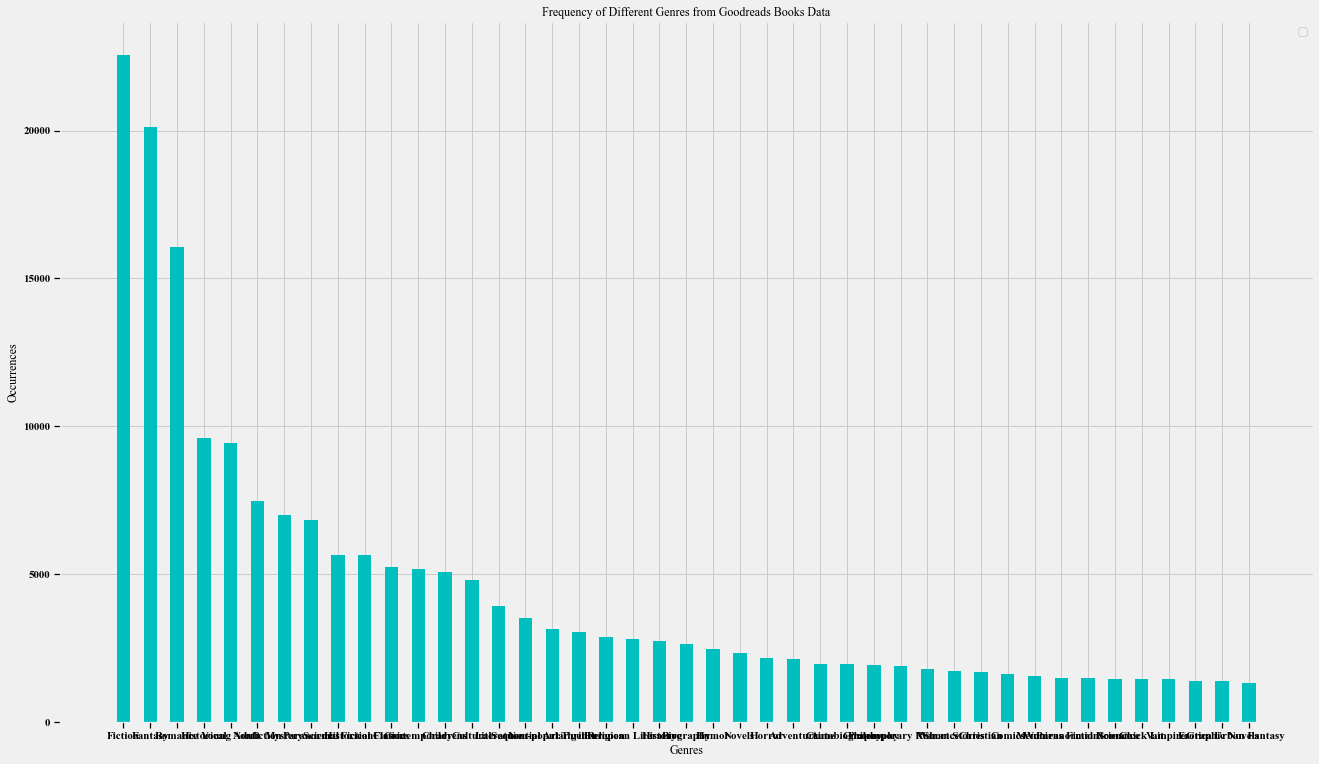

In [1611]:
# ~~~ MATPLOTLIB REFERENCE ~~~

# Defines the chart font style
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 18}

# includes the chart font style
plt.rc('font', **font)

# You can also define like this
# plt.rcParams["font.family"] = "Times New Roman"

# To define figure size
figure(num=None, figsize=(20, 12))

genre_percentile = 0.05
most_common_genres_count = genres_count[: int(len(genres_list) * genre_percentile)]

x_axis_labels = genres_list[:len(most_common_genres_count)]
y_axis_values = most_common_genres_count

# Creating n-dimensional array with evenly spaced values
y_pos=np.arange(len(x_axis_labels))

# Input bar values
# Define the bar styles with width, color, and legend labels
plt.bar(y_pos + 0, y_axis_values, width=0.5, color = 'c') #label='legend title')

# Define X-axis labels
plt.xticks(y_pos, x_axis_labels)

# Defines best position of the legend in the figure
plt.legend(loc='best')

# Defines X and Y axis labels
plt.ylabel('Occurrences')
plt.xlabel('Genres')

# Defines plot title
plt.title("Frequency of Different Genres from Goodreads Books Data")

# Show the plot
plt.show()

# To save the figure as pdf/png/jpg, use plt.savefig
# plt.savefig('Figure_name.pdf', dpi=300)

In [954]:
print(f"The top {len(x_axis_labels)} genres (accounting for {genre_percentile * 100}% of all genres) account for {sum(y_axis_values) / sum(genres_count)}% of the total instances of any genre in the data set.")

The top 431 genres (accounting for 50.0% of all genres) account for 0.99081286793126% of the total instances of any genre in the data set.


In [269]:
print(f"The top {len(x_axis_labels)} genres (accounting for {genre_percentile * 100}% of all genres) account for {sum(y_axis_values) / sum(genres_count)}% of the total instances of any genre in the data set.")

The top 216 genres (accounting for 25.0% of all genres) account for 0.9537621070966721% of the total instances of any genre in the data set.


In [271]:
print(f"The top {len(x_axis_labels)} genres (accounting for {genre_percentile * 100}% of all genres) account for {sum(y_axis_values) / sum(genres_count)}% of the total instances of any genre in the data set.")

The top 130 genres (accounting for 15.0% of all genres) account for 0.8973239027737457% of the total instances of any genre in the data set.


In [331]:
print(f"The top {len(x_axis_labels)} genres (accounting for {genre_percentile * 100}% of all genres) account for {sum(y_axis_values) / sum(genres_count)}% of the total instances of any genre in the data set.")

The top 86 genres (accounting for 10.0% of all genres) account for 0.8371067966938217% of the total instances of any genre in the data set.


In [737]:
print(f"The top {len(x_axis_labels)} genres (accounting for {genre_percentile * 100}% of all genres) account for {sum(y_axis_values) / sum(genres_count)}% of the total instances of any genre in the data set.")

The top 43 genres (accounting for 5.0% of all genres) account for 0.7132589046797884% of the total instances of any genre in the data set.


In [773]:
print(f"The top {len(x_axis_labels)} genres (accounting for {genre_percentile * 100}% of all genres) account for {sum(y_axis_values) / sum(genres_count)}% of the total instances of any genre in the data set.")

The top 21 genres (accounting for 2.5% of all genres) account for 0.5672905393351966% of the total instances of any genre in the data set.


In [1609]:
print(f"The top {len(x_axis_labels)} genres (accounting for {genre_percentile * 100}% of all genres) account for {sum(y_axis_values) / sum(genres_count)}% of the total instances of any genre in the data set.")

The top 43 genres (accounting for 5.0% of all genres) account for 0.7132589046797884% of the total instances of any genre in the data set.


In [809]:
print("Number of books: " + str(len(df_final_titlematch.index)))

Number of books: 48483


In [810]:
sum(genres_count)

269072

In [1612]:
# x_axis_labels.sort()
"The genres accounting for the top 10%: " + str(x_axis_labels)

"The genres accounting for the top 10%: ['Fiction', 'Fantasy', 'Romance', 'Historical', 'Young Adult', 'Nonfiction', 'Mystery', 'Paranormal', 'Science Fiction', 'Historical Fiction', 'Classics', 'Contemporary', 'Childrens', 'Cultural', 'Literature', 'Sequential Art', 'Non-popular genre', 'Thriller', 'Religion', 'European Literature', 'History', 'Biography', 'Humor', 'Novels', 'Horror', 'Adventure', 'Crime', 'Autobiography', 'Philosophy', 'Contemporary Romance', 'War', 'Short Stories', 'Christian', 'Comics', 'Memoir', 'Womens Fiction', 'Paranormal Romance', 'Science', 'Chick Lit', 'Vampires', 'Erotica', 'Graphic Novels', 'Urban Fantasy']"

In [1117]:
[x for x in df_final_titlematch['genres_x'] if type(x) != str]

[]

In [1241]:
L2 = x_axis_labels
S2 = set(L2)
genres_encoded = []
for x in df_final_titlematch.genres_x.values:
    L1 = x.split("|")
    S1 = set(L1)
    if not S1.intersection(S2):
        genres_encoded.append("Non-popular genre")
    else:
        genres_encoded.append(S1.intersection(S2).pop())
        
genres_encoded    

['Young Adult',
 'Young Adult',
 'Historical',
 'Fiction',
 'Fiction',
 'Young Adult',
 'Young Adult',
 'Fantasy',
 'Romance',
 'Fantasy',
 'Young Adult',
 'Fantasy',
 'Fiction',
 'Fiction',
 'Mystery',
 'Fiction',
 'Fantasy',
 'Fantasy',
 'Historical',
 'Young Adult',
 'Romance',
 'Romance',
 'Young Adult',
 'Fantasy',
 'Fiction',
 'Young Adult',
 'Young Adult',
 'Paranormal',
 'Historical',
 'Romance',
 'Romance',
 'Fiction',
 'Young Adult',
 'Historical',
 'Paranormal',
 'Fantasy',
 'Fiction',
 'Fantasy',
 'Romance',
 'Young Adult',
 'Young Adult',
 'Historical',
 'Young Adult',
 'Fiction',
 'Fantasy',
 'Young Adult',
 'Young Adult',
 'Young Adult',
 'Fiction',
 'Fiction',
 'Young Adult',
 'Fantasy',
 'Historical',
 'Young Adult',
 'Fiction',
 'Fantasy',
 'Fiction',
 'Fiction',
 'Historical',
 'Fantasy',
 'Historical',
 'Historical',
 'Fantasy',
 'Young Adult',
 'Young Adult',
 'Fiction',
 'Historical',
 'Fiction',
 'Fiction',
 'Fiction',
 'Romance',
 'Mystery',
 'Romance',
 'Young 

In [1242]:
df_final_titlematch['genres_encoded'] = genres_encoded

In [1243]:
df_final_titlematch.columns

Index(['book_title', 'title', 'original_title', 'book_authors', 'book_desc',
       'book_edition', 'book_format', 'book_isbn', 'book_pages', 'book_rating',
       'book_rating_count', 'book_review_count', 'genres_x', 'image_url',
       'adult', 'belongs_to_collection', 'budget', 'homepage', 'id', 'imdb_id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'video',
       'vote_average', 'vote_count', 'genres_encoded'],
      dtype='object')

In [1244]:
test_ohe = pd.get_dummies(df_final_titlematch.genres_encoded)
test_ohe

,Fantasy,Fiction,Historical,Mystery,Non-popular genre,Nonfiction,Paranormal,Romance,Young Adult
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
54296,0,0,0,0,0,1,0,0,0
54297,0,0,0,0,0,1,0,0,0
54298,0,0,0,0,1,0,0,0,0
54299,0,0,0,0,0,1,0,0,0


In [1245]:
df_final_titlematch = df_final_titlematch.merge(test_ohe, left_index=True, right_index=True)
df_final_titlematch

,book_title,title,original_title,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,...,genres_encoded,Fantasy,Fiction,Historical,Mystery,Non-popular genre,Nonfiction,Paranormal,Romance,Young Adult
0,The Hunger Games,the hunger games,The Hunger Games,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9780440000000.0,374 pages,4.33,...,Young Adult,0,0,0,0,0,0,0,0,1
1,Harry Potter and the Order of the Phoenix,harry potter and the order of the phoenix,Harry Potter and the Order of the Phoenix,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9780440000000.0,870 pages,4.48,...,Young Adult,0,0,0,0,0,0,0,0,1
2,To Kill a Mockingbird,to kill a mockingbird,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9780060000000.0,324 pages,4.27,...,Historical,0,0,1,0,0,0,0,0,0
3,Pride and Prejudice,pride and prejudice,Pride and Prejudice,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9780680000000.0,279 pages,4.25,...,Fiction,0,1,0,0,0,0,0,0,0
4,Twilight,twilight,Twilight,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9780320000000.0,498 pages,3.58,...,Fiction,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54296,Taking the Field: A Fan's Quest to Run the Tea...,REMOVE_ROW,REMOVE_ROW,Howard Megdal,"In this fearless and half-crazy story, Howard ...",NaN,Hardcover,9781610000000.0,256 pages,3.37,...,Nonfiction,0,0,0,0,0,1,0,0,0
54297,"The Baseball Talmud: Koufax, Greenberg, and th...",REMOVE_ROW,REMOVE_ROW,Howard Megdal,From the icons of the game to the players who ...,NaN,Hardcover,9780060000000.0,256 pages,3.97,...,Nonfiction,0,0,0,0,0,1,0,0,0
54298,"Wilpon's Folly - The Story of a Man, His Fortu...",REMOVE_ROW,REMOVE_ROW,Howard Megdal,NaN,NaN,Kindle Edition,NaN,NaN,3.66,...,Non-popular genre,0,0,0,0,1,0,0,0,0
54299,He Wanted the Moon: The Madness and Medical Ge...,REMOVE_ROW,REMOVE_ROW,Mimi Baird|Eve Claxton,"Soon to be a major motion picture, from Brad P...",NaN,Hardcover,9780800000000.0,272 pages,3.82,...,Nonfiction,0,0,0,0,0,1,0,0,0


In [1246]:
list(df_final_titlematch.columns)

['book_title',
 'title',
 'original_title',
 'book_authors',
 'book_desc',
 'book_edition',
 'book_format',
 'book_isbn',
 'book_pages',
 'book_rating',
 'book_rating_count',
 'book_review_count',
 'genres_x',
 'image_url',
 'adult',
 'belongs_to_collection',
 'budget',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'video',
 'vote_average',
 'vote_count',
 'genres_encoded',
 'Fantasy',
 'Fiction',
 'Historical',
 'Mystery',
 'Non-popular genre',
 'Nonfiction',
 'Paranormal',
 'Romance',
 'Young Adult']

In [1247]:
df_final_titlematch = df_final_titlematch.drop([
 'original_title', 
 'book_authors',
 'book_desc', 
 'book_edition', 
 'book_format',
 'book_isbn', 
 'genres_x', 
 'image_url', 
 'adult', 
 'belongs_to_collection',  
 'homepage', 
 'id',
 'imdb_id',
 'original_language',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date','runtime',
 'spoken_languages',
 'status',
 'tagline',
 'video',
 'vote_average',
 'vote_count',], axis=1)

In [1248]:
df_final_titlematch = df_final_titlematch[df_final_titlematch.title != "REMOVE_ROW"]

In [1249]:
df_final_titlematch = df_final_titlematch.loc[~(df_final_titlematch['budget'] == '0') & ~(df_final_titlematch['revenue'] == '0.0')]

In [1250]:
sum(df_final_titlematch.loc[:,"Non-popular genre"].values)

51

In [1251]:
len(df_final_titlematch)

1305

In [1252]:
display(df_final_titlematch)

,book_title,title,book_pages,book_rating,book_rating_count,book_review_count,budget,revenue,genres_encoded,Fantasy,Fiction,Historical,Mystery,Non-popular genre,Nonfiction,Paranormal,Romance,Young Adult
0,The Hunger Games,the hunger games,374 pages,4.33,5519135,160706,75000000,691210692.0,Young Adult,0,0,0,0,0,0,0,0,1
1,Harry Potter and the Order of the Phoenix,harry potter and the order of the phoenix,870 pages,4.48,2041594,33264,150000000,938212738.0,Young Adult,0,0,0,0,0,0,0,0,1
2,To Kill a Mockingbird,to kill a mockingbird,324 pages,4.27,3745197,79450,2000000,13129846.0,Historical,0,0,1,0,0,0,0,0,0
8,Gone with the Wind,gone with the wind,1037 pages,4.29,969181,17452,4000000,400176459.0,Romance,0,0,0,0,0,0,0,1,0
10,The Fault in Our Stars,the fault in our stars,313 pages,4.24,2881648,147270,12000000,307166834.0,Young Adult,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53851,Ladies' Man,the ladies man,264 pages,3.52,613,46,24000000,13700000.0,Mystery,0,0,0,1,0,0,0,0,0
53922,A Man on the Moon,man on the moon,688 pages,4.45,4505,322,82000000,47434430.0,Nonfiction,0,0,0,0,0,1,0,0,0
53946,The River,the river,160 pages,3.79,18574,1019,18000000,11500000.0,Young Adult,0,0,0,0,0,0,0,0,1
54079,The Pirates! In an Adventure with Scientists,the pirates in an adventure with scientists,144 pages,3.87,3570,463,60000000,118338361.0,Fantasy,1,0,0,0,0,0,0,0,0


In [1253]:
df_final_titlematch['budget'] = [float(x) for x in df_final_titlematch.budget.values]
df_final_titlematch['revenue'] = [float(x) for x in df_final_titlematch.revenue.values]

In [1254]:
revenue_by_budget = df_final_titlematch[["budget", "revenue"]]

In [1255]:
revenue_by_budget["Revenue / Budget"] = np.nan

<ipython-input-1255-4f9997fd4374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_by_budget["Revenue / Budget"] = np.nan


In [1256]:
revenue_by_budget

,budget,revenue,Revenue / Budget
0,75000000.0,691210692.0,NaN
1,150000000.0,938212738.0,NaN
2,2000000.0,13129846.0,NaN
8,4000000.0,400176459.0,NaN
10,12000000.0,307166834.0,NaN
...,...,...,...
53851,24000000.0,13700000.0,NaN
53922,82000000.0,47434430.0,NaN
53946,18000000.0,11500000.0,NaN
54079,60000000.0,118338361.0,NaN


In [1257]:
revenue_by_budget["Revenue / Budget"] = revenue_by_budget.apply(lambda row: row.revenue / row.budget, axis=1)

<ipython-input-1257-cd8245d3c132>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_by_budget["Revenue / Budget"] = revenue_by_budget.apply(lambda row: row.revenue / row.budget, axis=1)


In [1258]:
revenue_by_budget

,budget,revenue,Revenue / Budget
0,75000000.0,691210692.0,9.216143
1,150000000.0,938212738.0,6.254752
2,2000000.0,13129846.0,6.564923
8,4000000.0,400176459.0,100.044115
10,12000000.0,307166834.0,25.597236
...,...,...,...
53851,24000000.0,13700000.0,0.570833
53922,82000000.0,47434430.0,0.578469
53946,18000000.0,11500000.0,0.638889
54079,60000000.0,118338361.0,1.972306


In [1259]:
df_final_titlematch = df_final_titlematch.merge(revenue_by_budget['Revenue / Budget'], left_index=True, right_index=True)


In [1260]:
display(df_final_titlematch)

,book_title,title,book_pages,book_rating,book_rating_count,book_review_count,budget,revenue,genres_encoded,Fantasy,Fiction,Historical,Mystery,Non-popular genre,Nonfiction,Paranormal,Romance,Young Adult,Revenue / Budget
0,The Hunger Games,the hunger games,374 pages,4.33,5519135,160706,75000000.0,691210692.0,Young Adult,0,0,0,0,0,0,0,0,1,9.216143
1,Harry Potter and the Order of the Phoenix,harry potter and the order of the phoenix,870 pages,4.48,2041594,33264,150000000.0,938212738.0,Young Adult,0,0,0,0,0,0,0,0,1,6.254752
2,To Kill a Mockingbird,to kill a mockingbird,324 pages,4.27,3745197,79450,2000000.0,13129846.0,Historical,0,0,1,0,0,0,0,0,0,6.564923
8,Gone with the Wind,gone with the wind,1037 pages,4.29,969181,17452,4000000.0,400176459.0,Romance,0,0,0,0,0,0,0,1,0,100.044115
10,The Fault in Our Stars,the fault in our stars,313 pages,4.24,2881648,147270,12000000.0,307166834.0,Young Adult,0,0,0,0,0,0,0,0,1,25.597236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53851,Ladies' Man,the ladies man,264 pages,3.52,613,46,24000000.0,13700000.0,Mystery,0,0,0,1,0,0,0,0,0,0.570833
53922,A Man on the Moon,man on the moon,688 pages,4.45,4505,322,82000000.0,47434430.0,Nonfiction,0,0,0,0,0,1,0,0,0,0.578469
53946,The River,the river,160 pages,3.79,18574,1019,18000000.0,11500000.0,Young Adult,0,0,0,0,0,0,0,0,1,0.638889
54079,The Pirates! In an Adventure with Scientists,the pirates in an adventure with scientists,144 pages,3.87,3570,463,60000000.0,118338361.0,Fantasy,1,0,0,0,0,0,0,0,0,1.972306


In [1261]:
average_book_pages = int(np.mean([int(x.split(" ")[0]) for x in df_final_titlematch['book_pages'].values if type(x) == str]))
average_book_pages

338

In [1262]:
df_final_titlematch['book_pages'] = df_final_titlematch['book_pages'].fillna(average_book_pages)

In [1263]:
df_final_titlematch['book_pages'] = [int(x.split(" ")[0]) if type(x) == str else x for x in df_final_titlematch['book_pages'].values]

In [1264]:
df_final_titlematch.describe()

,book_pages,book_rating,book_rating_count,book_review_count,budget,revenue,Fantasy,Fiction,Historical,Mystery,Non-popular genre,Nonfiction,Paranormal,Romance,Young Adult,Revenue / Budget
count,1305.000000,1305.000000,1.305000e+03,1305.000000,1.305000e+03,1.305000e+03,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1.305000e+03
mean,338.695019,3.975648,1.249596e+05,4496.157088,3.267843e+07,9.519756e+07,0.083525,0.185441,0.108812,0.120307,0.039080,0.058238,0.087356,0.142529,0.174713,9.505144e+03
std,197.886359,0.269173,3.854509e+05,12830.458543,3.659740e+07,1.523602e+08,0.276780,0.388804,0.311523,0.325444,0.193861,0.234282,0.282465,0.349726,0.379867,3.431544e+05
min,0.000000,2.860000,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.100833e-04
25%,232.000000,3.820000,2.474000e+03,168.000000,7.000000e+06,1.089829e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.225846e-01
50%,320.000000,3.980000,1.186400e+04,711.000000,2.000000e+07,3.812210e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.153159e+00
75%,406.000000,4.140000,6.198300e+04,2760.000000,4.500000e+07,1.152674e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.292241e+00
max,3338.000000,5.000000,5.522483e+06,160762.000000,2.600000e+08,1.845034e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.239638e+07


In [1265]:
df_final_titlematch.drop("genres_encoded", axis=1)

,book_title,title,book_pages,book_rating,book_rating_count,book_review_count,budget,revenue,Fantasy,Fiction,Historical,Mystery,Non-popular genre,Nonfiction,Paranormal,Romance,Young Adult,Revenue / Budget
0,The Hunger Games,the hunger games,374,4.33,5519135,160706,75000000.0,691210692.0,0,0,0,0,0,0,0,0,1,9.216143
1,Harry Potter and the Order of the Phoenix,harry potter and the order of the phoenix,870,4.48,2041594,33264,150000000.0,938212738.0,0,0,0,0,0,0,0,0,1,6.254752
2,To Kill a Mockingbird,to kill a mockingbird,324,4.27,3745197,79450,2000000.0,13129846.0,0,0,1,0,0,0,0,0,0,6.564923
8,Gone with the Wind,gone with the wind,1037,4.29,969181,17452,4000000.0,400176459.0,0,0,0,0,0,0,0,1,0,100.044115
10,The Fault in Our Stars,the fault in our stars,313,4.24,2881648,147270,12000000.0,307166834.0,0,0,0,0,0,0,0,0,1,25.597236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53851,Ladies' Man,the ladies man,264,3.52,613,46,24000000.0,13700000.0,0,0,0,1,0,0,0,0,0,0.570833
53922,A Man on the Moon,man on the moon,688,4.45,4505,322,82000000.0,47434430.0,0,0,0,0,0,1,0,0,0,0.578469
53946,The River,the river,160,3.79,18574,1019,18000000.0,11500000.0,0,0,0,0,0,0,0,0,1,0.638889
54079,The Pirates! In an Adventure with Scientists,the pirates in an adventure with scientists,144,3.87,3570,463,60000000.0,118338361.0,1,0,0,0,0,0,0,0,0,1.972306


In [1266]:
df_final_titlematch = df_final_titlematch.loc[:, ~df_final_titlematch.eq(0.0).all()]

In [1267]:
df_final_train = df_final_titlematch.drop(['book_title', 'title', 'genres_encoded', 'revenue'], axis=1)

In [1268]:
display(df_final_train)

,book_pages,book_rating,book_rating_count,book_review_count,budget,Fantasy,Fiction,Historical,Mystery,Non-popular genre,Nonfiction,Paranormal,Romance,Young Adult,Revenue / Budget
0,374,4.33,5519135,160706,75000000.0,0,0,0,0,0,0,0,0,1,9.216143
1,870,4.48,2041594,33264,150000000.0,0,0,0,0,0,0,0,0,1,6.254752
2,324,4.27,3745197,79450,2000000.0,0,0,1,0,0,0,0,0,0,6.564923
8,1037,4.29,969181,17452,4000000.0,0,0,0,0,0,0,0,1,0,100.044115
10,313,4.24,2881648,147270,12000000.0,0,0,0,0,0,0,0,0,1,25.597236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53851,264,3.52,613,46,24000000.0,0,0,0,1,0,0,0,0,0,0.570833
53922,688,4.45,4505,322,82000000.0,0,0,0,0,0,1,0,0,0,0.578469
53946,160,3.79,18574,1019,18000000.0,0,0,0,0,0,0,0,0,1,0.638889
54079,144,3.87,3570,463,60000000.0,1,0,0,0,0,0,0,0,0,1.972306


In [ ]:
df_final_train.to_csv('df_temp.csv', index=False)

In [1541]:
# GO HERE FOR RESETS
df_final_train = pd.read_csv('df_temp.csv')

In [1542]:
df_final_train = df_final_train.loc[df_final_train['Revenue / Budget'] <= 30]
len(df_final_train)

1266

In [1544]:
bns = pd.qcut(df_final_train['Revenue / Budget'], q=3, retbins=True)
bns[1]

array([2.10083333e-04, 1.23188385e+00, 3.27321620e+00, 2.89152000e+01])

(array([  0., 422., 421., 423.]),
 array([0.00000000e+00, 2.10083333e-04, 1.23188385e+00, 3.27321620e+00,
        2.89152000e+01]),
 <BarContainer object of 4 artists>)

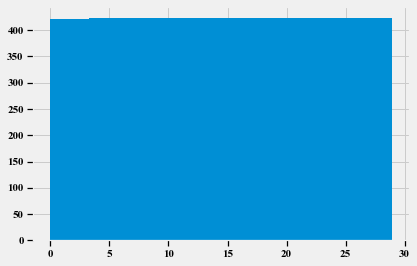

In [1545]:
x = list(df_final_train['Revenue / Budget'])
bin_width = 1
plt.hist(x, bins=[0, 2.10083333e-04, 1.23188385e+00, 3.27321620e+00, 2.89152000e+01])

In [1546]:
#bins = [0, 0.678, 1.662, 2.696, 5.013, np.inf]
bins = [0, 2.10083333e-04, 1.23188385e+00, 3.27321620e+00, 2.89152000e+01]
names = [1, 2, 3, 4]

df_final_train['R/B Classification'] = pd.cut(df_final_train['Revenue / Budget'], bins, labels=names)

In [1547]:
df_final_train[df_final_train["R/B Classification"] == 4]

,book_pages,book_rating,book_rating_count,book_review_count,budget,Fantasy,Fiction,Historical,Mystery,Non-popular genre,Nonfiction,Paranormal,Romance,Young Adult,Revenue / Budget,R/B Classification
0,374,4.33,5519135,160706,75000000.0,0,0,0,0,0,0,0,0,1,9.216143,4
1,870,4.48,2041594,33264,150000000.0,0,0,0,0,0,0,0,0,1,6.254752,4
2,324,4.27,3745197,79450,2000000.0,0,0,1,0,0,0,0,0,0,6.564923,4
4,313,4.24,2881648,147270,12000000.0,0,0,0,0,0,0,0,0,1,25.597236,4
6,481,3.81,1668594,43699,125000000.0,0,0,0,1,0,0,0,0,0,6.142564,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,96,4.17,1115,29,55000000.0,0,0,0,0,1,0,0,0,0,6.292360,4
1295,304,3.95,9134,1155,12000000.0,0,1,0,0,0,0,0,0,0,5.095086,4
1297,10,3.37,24197,3015,14000000.0,0,0,1,0,0,0,0,0,0,3.730236,4
1299,56,4.52,3594,325,18000000.0,1,0,0,0,0,0,0,0,0,4.201912,4


### Normalize book_rating_count and book_review_count

In [1548]:
def normalizer(df, column_names, new_names):
    global names
    for column_name, new_name in zip(column_names, new_names):
        bins = pd.qcut(df[column_name], q=4, retbins=True)[1]
        df[new_name] = pd.cut(df[column_name], bins, labels=names)
    display(df)

In [1549]:
normalizer(df_final_train, column_names=['book_review_count', 'book_rating_count'], new_names=['book_review_count_normalized', 'book_rating_count_normalized'])

,book_pages,book_rating,book_rating_count,book_review_count,budget,Fantasy,Fiction,Historical,Mystery,Non-popular genre,Nonfiction,Paranormal,Romance,Young Adult,Revenue / Budget,R/B Classification,book_review_count_normalized,book_rating_count_normalized
0,374,4.33,5519135,160706,75000000.0,0,0,0,0,0,0,0,0,1,9.216143,4,4,4
1,870,4.48,2041594,33264,150000000.0,0,0,0,0,0,0,0,0,1,6.254752,4,4,4
2,324,4.27,3745197,79450,2000000.0,0,0,1,0,0,0,0,0,0,6.564923,4,4,4
4,313,4.24,2881648,147270,12000000.0,0,0,0,0,0,0,0,0,1,25.597236,4,4,4
5,193,4.21,1155911,23919,50000000.0,1,0,0,0,0,0,0,0,0,2.089568,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,264,3.52,613,46,24000000.0,0,0,0,1,0,0,0,0,0,0.570833,2,1,1
1301,688,4.45,4505,322,82000000.0,0,0,0,0,0,1,0,0,0,0.578469,2,2,2
1302,160,3.79,18574,1019,18000000.0,0,0,0,0,0,0,0,0,1,0.638889,2,3,3
1303,144,3.87,3570,463,60000000.0,1,0,0,0,0,0,0,0,0,1.972306,3,2,2


In [1550]:
df_final_train['book_rating_count'] = df_final_train['book_rating_count_normalized']
df_final_train['book_review_count'] = df_final_train['book_review_count_normalized']
df_final_train = df_final_train.drop(['book_rating_count_normalized', 'book_review_count_normalized'], axis=1)
df_final_train

,book_pages,book_rating,book_rating_count,book_review_count,budget,Fantasy,Fiction,Historical,Mystery,Non-popular genre,Nonfiction,Paranormal,Romance,Young Adult,Revenue / Budget,R/B Classification
0,374,4.33,4,4,75000000.0,0,0,0,0,0,0,0,0,1,9.216143,4
1,870,4.48,4,4,150000000.0,0,0,0,0,0,0,0,0,1,6.254752,4
2,324,4.27,4,4,2000000.0,0,0,1,0,0,0,0,0,0,6.564923,4
4,313,4.24,4,4,12000000.0,0,0,0,0,0,0,0,0,1,25.597236,4
5,193,4.21,4,4,50000000.0,1,0,0,0,0,0,0,0,0,2.089568,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,264,3.52,1,1,24000000.0,0,0,0,1,0,0,0,0,0,0.570833,2
1301,688,4.45,2,2,82000000.0,0,0,0,0,0,1,0,0,0,0.578469,2
1302,160,3.79,3,3,18000000.0,0,0,0,0,0,0,0,0,1,0.638889,2
1303,144,3.87,2,2,60000000.0,1,0,0,0,0,0,0,0,0,1.972306,3


In [1551]:
for x in df_final_train.columns:
    if df_final_train[x].dtype == np.float64:
        df_final_train[x] = pd.to_numeric(arg=df_final_train[x], downcast='float')
    print(df_final_train[x].dtype)

int64
float32
category
category
float32
int64
int64
int64
int64
int64
int64
int64
int64
int64
float32
category


In [1552]:
df_final_train[df_final_train.isna().any(axis=1)]

,book_pages,book_rating,book_rating_count,book_review_count,budget,Fantasy,Fiction,Historical,Mystery,Non-popular genre,Nonfiction,Paranormal,Romance,Young Adult,Revenue / Budget,R/B Classification
747,338,4.06,1,NaN,45000000.0,0,1,0,0,0,0,0,0,0,1.130469,2
758,338,4.33,1,NaN,28000000.0,0,0,0,0,0,0,1,0,0,1.712571,3
797,99,4.00,1,NaN,5000000.0,0,0,0,0,1,0,0,0,0,0.477425,2
812,160,4.00,1,NaN,60000000.0,0,0,0,0,1,0,0,0,0,1.685568,3
814,434,4.60,1,NaN,200000000.0,0,0,0,0,0,1,0,0,0,9.225171,4
843,338,4.47,1,NaN,58000000.0,0,0,0,0,1,0,0,0,0,13.501948,4
883,338,5.00,1,NaN,15000000.0,0,0,0,0,1,0,0,0,0,2.367301,3
944,338,4.89,1,NaN,5000000.0,0,0,0,0,1,0,0,0,0,1.952021,3
1204,338,5.00,NaN,NaN,7000000.0,0,0,0,0,1,0,0,0,0,1.273554,3


In [1553]:
df_final_train = df_final_train.dropna()

In [1554]:
df_final_train = df_final_train.drop(["budget", "Revenue / Budget"], axis=1)

In [1555]:
df_final_train.columns

Index(['book_pages', 'book_rating', 'book_rating_count', 'book_review_count',
       'Fantasy', 'Fiction', 'Historical', 'Mystery', 'Non-popular genre',
       'Nonfiction', 'Paranormal', 'Romance', 'Young Adult',
       'R/B Classification'],
      dtype='object')

In [1556]:
sum(df_final_train['Non-popular genre'].values)

44

In [1557]:
len(df_final_train)

1257

In [1558]:
df_final_train.to_csv('df_final_train', index=False)

# Modeling 

In [484]:
pip install sklearn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1213]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [1559]:
df_final_train = pd.read_csv('df_final_train')

## Data Split

In [1560]:
X = df_final_train[df_final_train.columns[:-1]]
y = df_final_train['R/B Classification']

X, y

(      book_pages  book_rating  book_rating_count  book_review_count  Fantasy  \
 0            374         4.33                  4                  4        0   
 1            870         4.48                  4                  4        0   
 2            324         4.27                  4                  4        0   
 3            313         4.24                  4                  4        0   
 4            193         4.21                  4                  4        1   
 ...          ...          ...                ...                ...      ...   
 1252         264         3.52                  1                  1        0   
 1253         688         4.45                  2                  2        0   
 1254         160         3.79                  3                  3        0   
 1255         144         3.87                  2                  2        1   
 1256         226         4.38                  1                  1        0   
 
       Fiction  Historical

### Perform 80-20 Train-Test Split

In [1561]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

#### Shape of the Data

In [1562]:
X_train.shape, Y_train.shape

((1005, 13), (1005,))

In [1563]:
X_test.shape, Y_test.shape

((252, 13), (252,))

## Random Forest Classification

In [1564]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [1565]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [1], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [1566]:
rf_Model = RandomForestClassifier()

In [1567]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 3)

In [1568]:
rf_Grid.fit(X_train, Y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [1]},
             verbose=2)

In [1569]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1}

In [1570]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,Y_test):.3f}')

Train Accuracy - : 0.393
Test Accuracy - : 0.337


## Classifiers Comparison

In [1576]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score, average='micro'),
           'recall':make_scorer(recall_score, average='micro'), 
           'f1_score':make_scorer(f1_score, average='micro')}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models' performance metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(X, y, 5)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.361146,0.359565,0.338057,0.330937,0.330937,Logistic Regression
Precision,0.361146,0.359565,0.338057,0.330937,0.330937,Logistic Regression
Recall,0.361146,0.359565,0.338057,0.330937,0.330937,Logistic Regression
F1 Score,0.361146,0.359565,0.338057,0.330937,0.330937,Logistic Regression


## Logistic Regression Hyperparameter Tuning

In [1577]:
logModel = LogisticRegression()

In [1581]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [1582]:
log_clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [1583]:
best_clf = log_clf.fit(X_train,Y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.34925373 ...        nan 0.35323383 0.35223881]
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [1584]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')
print (f'Accuracy - : {best_clf.score(X_train,Y_train):.3f}')
print (f'Accuracy - : {best_clf.score(X_test,Y_test):.3f}')


Accuracy - : 0.363
Accuracy - : 0.378
Accuracy - : 0.302


# Random Shit

In [1590]:
goodreads.columns

Index(['book_authors', 'book_desc', 'book_edition', 'book_format', 'book_isbn',
       'book_pages', 'book_rating', 'book_rating_count', 'book_review_count',
       'book_title', 'genres', 'image_url'],
      dtype='object')